In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

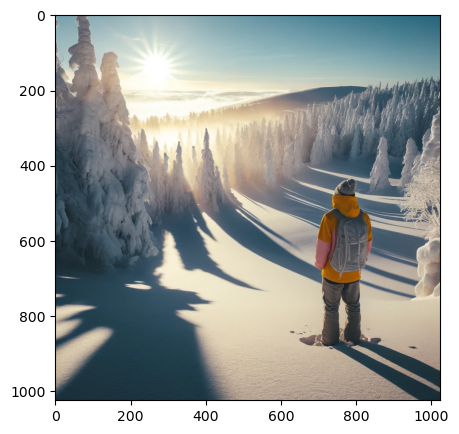

In [9]:
plt.rcParams['figure.figsize'] = [15, 5]

img = cv2.imread('C:/Users/user/anaconda3/white.webp')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

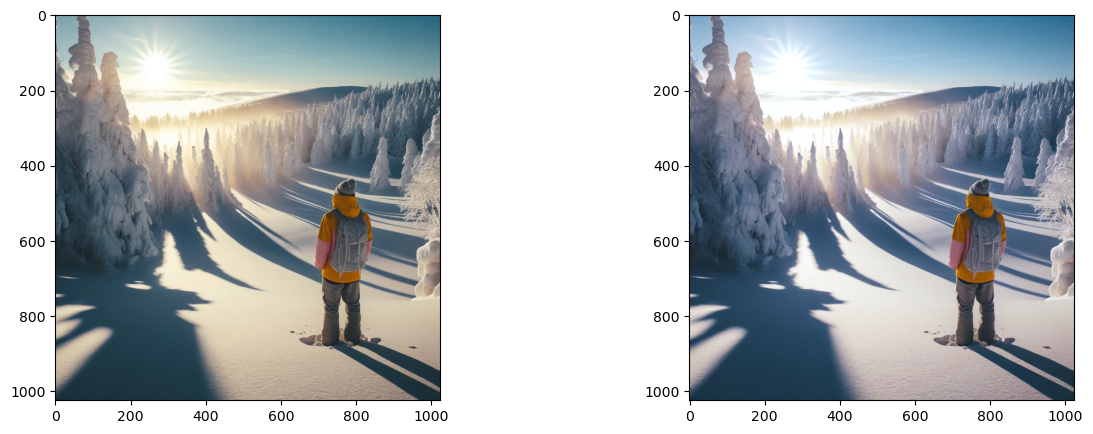

In [10]:
# Define white patch and the coefficients
row, col = 200, 500
white = img[row, col, :]
coeffs = 255.0 / white

# Apply white balancing and generate balanced image
balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]

# White patching does not guarantee that the dynamic range is preserved, images must be clipped.
balanced = balanced / 255
balanced[balanced > 1] = 1

# Отображаем исходное и сбалансированное изображение
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)
plt.show()

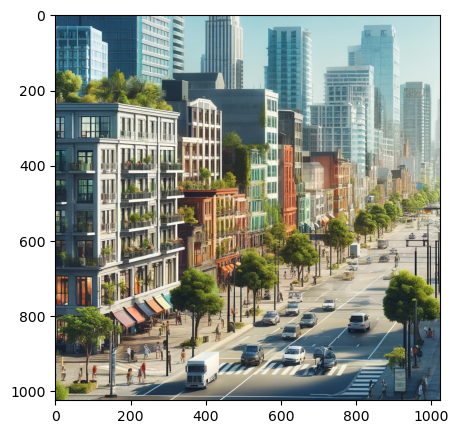

In [11]:
img = cv2.imread('C:/Users/user/anaconda3/town.webp')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

In [12]:
# Compute the mean values for all three colour channels (red, green, blue)
mean_r = np.mean(img[..., 0])
mean_g = np.mean(img[..., 1])
mean_b = np.mean(img[..., 2])

In [13]:
# Compute the coefficients kr, kg, kb
# Note: there are 3 coefficients to compute but we only have 2 equations.
# Therefore, you have to make an assumption, fix the value of one of the
# coefficients and compute the remining two
# Hint: You can fix the coefficient of the brightest colour channel to 1.
kr = 1.0
kg = mean_r / mean_g
kb = mean_r / mean_b

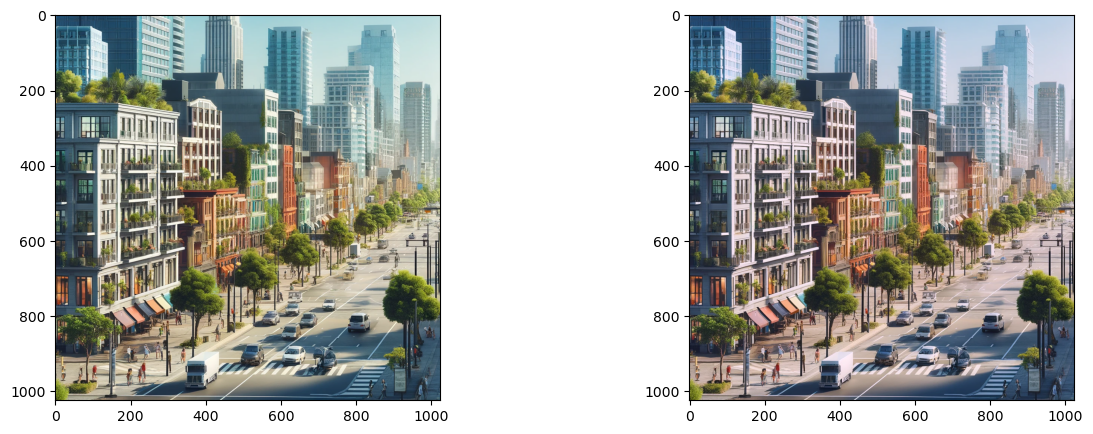

In [14]:
# Apply color balancing and generate the balanced image
balanced[..., 0] = img[..., 0] * kr
balanced[..., 1] = img[..., 1] * kg
balanced[..., 2] = img[..., 2] * kb
balanced = np.clip(balanced, 0, 255)
balanced = balanced.astype(np.uint8)

# Show the original and the balanced image side by side
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)
plt.show()

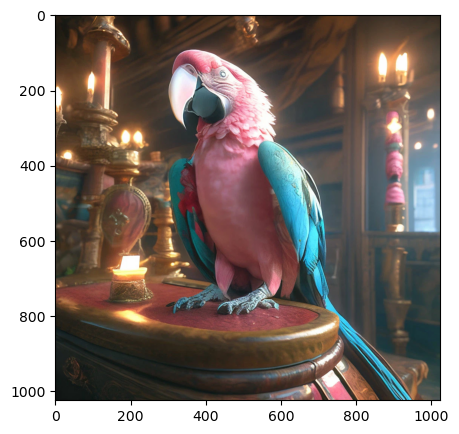

In [70]:
img = cv2.imread('C:/Users/user/anaconda3/parrot.webp')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

In [71]:
# Compute the maximum values for all three colour channels (red, green, blue)
max_r = np.max(img[..., 0])
max_g = np.max(img[..., 1])
max_b = np.max(img[..., 2])

In [109]:
# Apply scale-by-max balancing and generate the balanced image
balanced = np.zeros_like(img, dtype=np.float32)
balanced[..., 0] = img[..., 0] / max_r * 255.0
balanced[..., 1] = img[..., 1] / max_g * 255.0
balanced[..., 2] = img[..., 2] / max_b * 255.0
balanced = np.clip(balanced, 0, 255).astype(np.uint8)

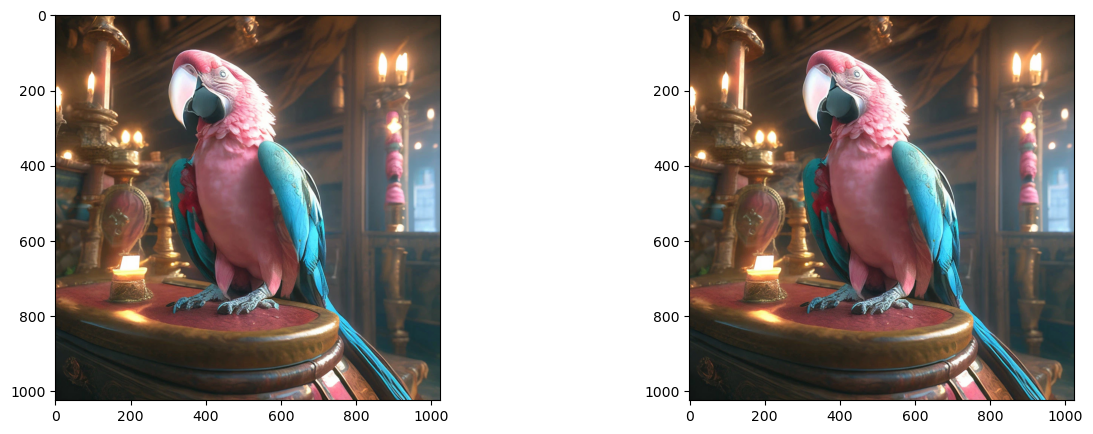

In [110]:
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)
plt.show()